## Домашнее задание 1

**Разбаловка**: 

1) задачи 1 - 4: по 1 баллу
2) задачи 5 - 6: по 2 балла
3) задача 7: 4 балла

Максимальный балл: 12 баллов. Оценка за задание ставится как `min(10, ваш балл)`. 

### Пакет NumPy
---


In [1]:
import itertools

import numpy as np
import random
import scipy.stats as sps

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.stats as sps
import numpy as np

import torch
import torch.nn as nn

import nltk

import tqdm

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

# Задача 1
В первой задаче вам предлагается перемножить две матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [ ]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100, 1000))
b = np.random.sample((1000, 100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
print(f"a dim: {a.ndim}, shape: {a.shape}")
print(f"b dim: {b.ndim}, shape: {b.shape}")

a dim: 2, shape: (100, 1000)
b dim: 2, shape: (1000, 100)


In [ ]:
def mult(a, b):
    if len(a[0]) != len(b):
        print('matrices not aligned')
        return None

    rez = np.zeros(shape=(len(a), len(b[0])))

    for i in range(len(a)):
        for k in range(len(b[0])):
            for j in range(len(a[0])):
                rez[i][k] += a[i][j] * b[j][k]

    return rez

In [ ]:
def np_mult(a, b):
    return a.dot(b)

In [ ]:
# Превратим матрицы в листы, чтобы протестировать функцию без np
a_list = [[x for x in row] for row in a]
b_list = [[x for x in row] for row in b]

In [ ]:
np.allclose(np.array(mult(a_list, b_list)), np_mult(a, b))

True

In [ ]:
% % time
# засечем время работы функции без NumPy
mult(a_list, b_list)

CPU times: user 5.95 s, sys: 246 ms, total: 6.19 s
Wall time: 5.46 s


array([[243.7671077 , 239.05255778, 238.34820856, ..., 235.34332973,
        234.8057887 , 230.83725666],
       [248.1063404 , 242.02440886, 237.94951155, ..., 240.56444935,
        237.13274308, 233.19214513],
       [250.65050612, 250.82607841, 243.03224868, ..., 243.99023504,
        243.08543206, 242.17762191],
       ...,
       [257.04707444, 254.55862529, 248.34035169, ..., 250.25856575,
        253.2860361 , 247.01356201],
       [265.82381937, 262.36463875, 256.60421295, ..., 254.3152596 ,
        260.8385311 , 252.44112617],
       [244.40627984, 245.10032727, 235.15964916, ..., 235.25462893,
        235.45229217, 236.67153442]])

In [ ]:
% % time
# засечем время работы функции с NumPy
np_mult(a, b)

CPU times: user 2.78 ms, sys: 1.66 ms, total: 4.44 ms
Wall time: 572 µs


array([[243.7671077 , 239.05255778, 238.34820856, ..., 235.34332973,
        234.8057887 , 230.83725666],
       [248.1063404 , 242.02440886, 237.94951155, ..., 240.56444935,
        237.13274308, 233.19214513],
       [250.65050612, 250.82607841, 243.03224868, ..., 243.99023504,
        243.08543206, 242.17762191],
       ...,
       [257.04707444, 254.55862529, 248.34035169, ..., 250.25856575,
        253.2860361 , 247.01356201],
       [265.82381937, 262.36463875, 256.60421295, ..., 254.3152596 ,
        260.8385311 , 252.44112617],
       [244.40627984, 245.10032727, 235.15964916, ..., 235.25462893,
        235.45229217, 236.67153442]])

## Задача 2

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить (конкатенировать) массив X с преобразованным X и вывести в обратном порядке. 

In [ ]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = np.where(np.arange(X.shape[0]) % 2 == 0, np.flip(X) ** 3, np.full_like(X, a))
    Y = np.flip(np.hstack((X, Y)))
    return Y

In [ ]:
# функция, решающая задачу без NumPy
def stupid_transformation(X, a=1):
    Y = [0] * len(X)
    X_r = list(reversed(X))
    for i in range(len(X)):
        if i % 2 == 0:
            Y[i] = X_r[i] ** 3
        else:
            Y[i] = a
    Y = (X + Y)
    Y.reverse()
    return Y

In [ ]:
print(stupid_transformation([1, 2, 3, 4, 6, 7, 8, 9], 5))
print(transformation(np.array([1, 2, 3, 4, 6, 7, 8, 9]), 5))

[5, 8, 5, 64, 5, 343, 5, 729, 9, 8, 7, 6, 4, 3, 2, 1]
[  5   8   5  64   5 343   5 729   9   8   7   6   4   3   2   1]


In [ ]:
X = sps.uniform.rvs(size=10 ** 7)
X_list = list(X)
# здесь код эффективнее примерно в 10 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
% time S1 = transformation(X)
% time S2 = stupid_transformation(X_list)
# проверим корректность:
print(np.abs(S1 - S2).sum())

CPU times: user 458 ms, sys: 172 ms, total: 630 ms
Wall time: 746 ms
CPU times: user 1.53 s, sys: 132 ms, total: 1.66 s
Wall time: 1.69 s
0.0


Почему методы ***numpy*** оказываются эффективнее?

потому что numpy лучше 🗿

## Задача 3

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [ ]:
% matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)


def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

/var/folders/3f/zdr9bx9916d5985j006hy68c0000gn/T/ipykernel_18621/4047005831.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


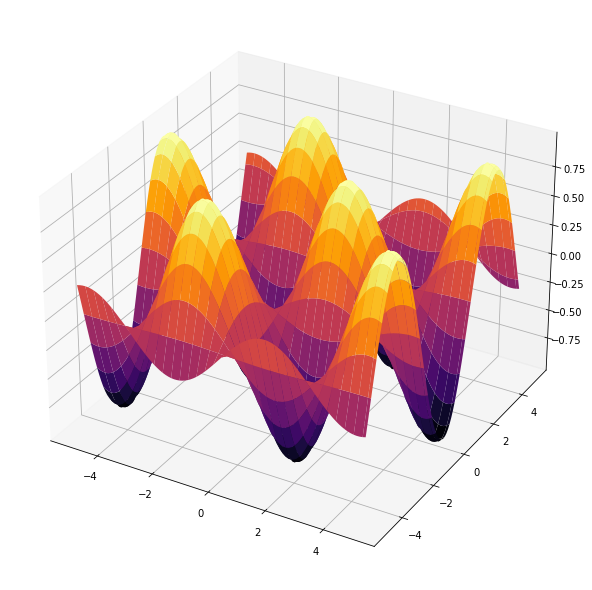

In [ ]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
grid_x, grid_y = np.meshgrid(x, y)

draw_f(grid_x, grid_y)

реально красивый

### Пакет Matplotlib
---


In [24]:
import scipy.stats as sps
import numpy as np

import matplotlib.pyplot as plt

## Задача 4

В этом задании вам показан график, который нужно получить (иллюстрирующий ЦПТ / бутстреп) и посчитаны все необходимые массивы. Вам нужно написать код, который отрисовывает максимально похожий график (revrese engineering решаем).

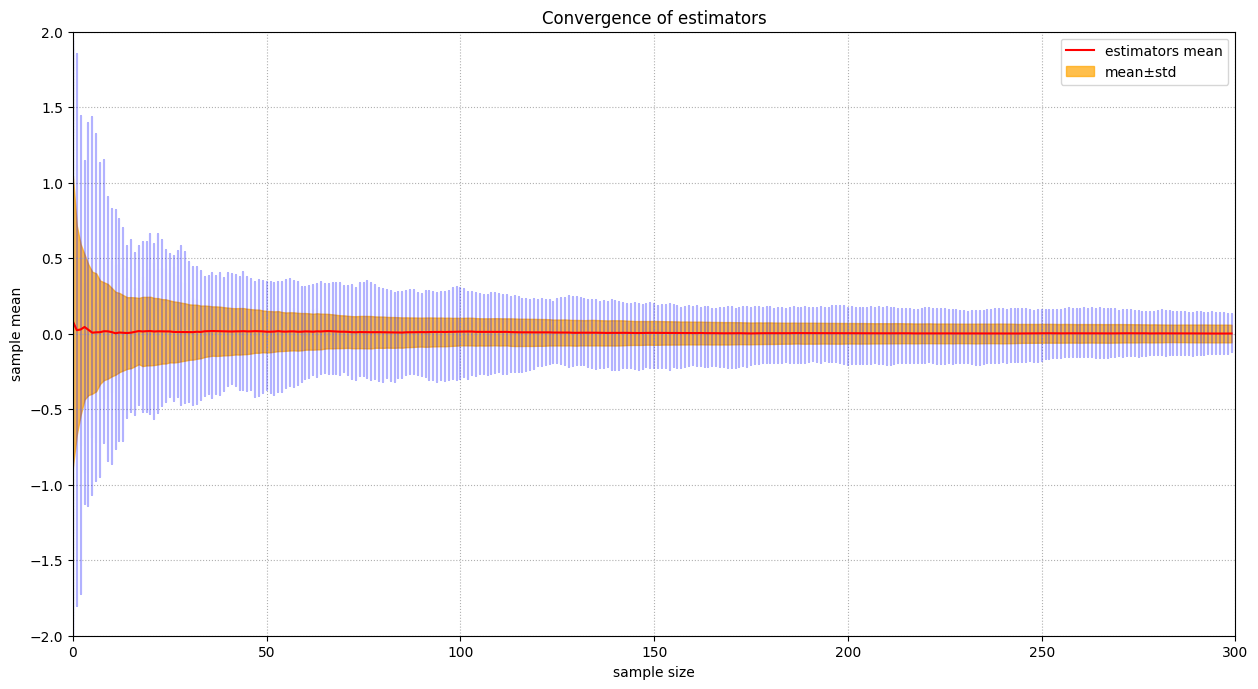

In [33]:
# it's not much but it's honest work
cnt_samples = 200
n = 300
theta = 0

samples = sps.norm.rvs(size=(cnt_samples, n))
thetas = np.cumsum(samples, axis=1) / np.arange(1, n + 1)

mean_theta = np.mean(thetas, axis=0)
stds = np.std(thetas, axis=0)

plt.figure(figsize=(15, 8), dpi=100)
plt.title('Convergence of estimators')

x = range(n)

for xe, ye in zip(x, thetas.transpose()):
    plt.plot([xe] * len(ye), ye, color='blue', alpha=0.3)
plt.plot(x, mean_theta, color='red', label='estimators mean')
plt.fill_between(x, mean_theta + stds, mean_theta - stds, color='orange', alpha=0.7, label='mean±std')

plt.grid(ls=':')
plt.xlabel('sample size')
plt.ylabel('sample mean')

plt.xlim((0, 300))
plt.ylim((-2, 2))

plt.legend(loc='best')
plt.show()

In [ ]:
raise ValueError("In case you deside do run all the cells before watching the example below")

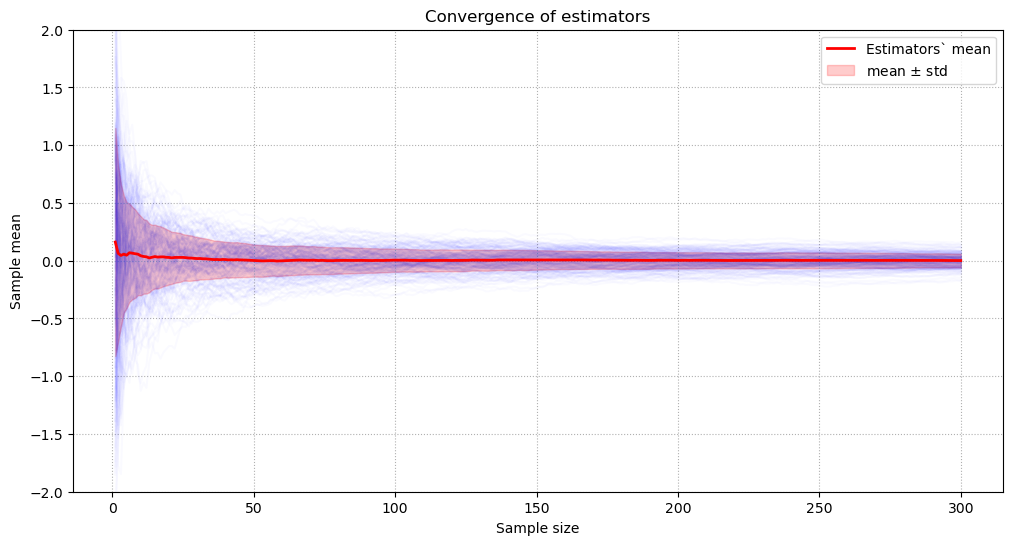

In [ ]:
# EXAMPLE, do not run this cell

### Пакет pytorch
---


In [3]:
import torch

In [15]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [7]:
set_random_seed(1337)

*Дисклеймер 1:* в последующих задачах необходимо будет рисовать графики. Графики должны быть понятными. Критерий понятности: на график можно посмотреть в отрыве от кода и полностью понять что на нем изображено. Используйте подписи к осям, легенду и т.д.

*Дисклеймер 2:* весь код на торче должен запускаться без изменений как на CPU, так и на GPU (если оно доступно). 


## Задача 5


Есть такой алгоритм машинного обучения, который называется "Метод опорных векторов" (SVM). 

В его сути много интересной теории связанной с линейной алгеброй, но сейчас нам это не так интересно. В этом задании необходимо "реализовать" оптимизацию Loss-а для SVM с помощью torch (аналогично ячейкам раздела Optimization с семинарского ноутбука).

Для этого потребуются следующие формулы: 

Предсказания $y\_pred = <x, w>$ и функция потерь на одном объекте $loss(y, y\_pred) = \max(1 - y \cdot y\_pred, 0)$

In [ ]:
def svm_loss(y_pred, y_true):
    # реализуйте функцию потерь SVM. Помните что на вход приходят тензоры ответов на всех объектах
    # а вернуть нужно одно число -- лосс для всей выборки
    return torch.mean(
        torch.max(torch.cat((torch.ones_like(y_true) - y_true * y_pred, torch.zeros_like(y_true)), 1), dim=1)[0])


x = torch.randn(100, 10).to(device)  # выборка, здесь тоже необходимо что-то поменять чтобы удовлетворить дисклеймер 2
y = torch.randint(0, 2, size=(100, 1)).to(device)
y[y == 0] = -1  # случайный массив из +1 или -1 который будет в роли таргетов

In [ ]:
torch.std(x)

tensor(0.9839)

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(x, y, title, x_label='x', y_label='y', color='red', linestyle='-'):
    plt.figure(figsize=(7, 5), dpi=100)
    plt.title(title)

    plt.plot(x, y, color=color, linestyle=linestyle, linewidth=2)
    plt.scatter(x, y, color=color)

    plt.grid(ls=':')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

Сохраните как менялся лосс при использовании 2-3 различных оптимизаторов, постройте соответствующие графики (с помощью matplotlib), выберите лучший для конкретно этой задачи.

In [ ]:
def get_graphs_on_learning(optim, x, w, y, n_epochs=10):
    for epoch in range(n_epochs):
        ### optimization step
        optim.zero_grad()  # may be inefficient in case of very large NN

        y_pred = torch.mm(x, w)
        loss = svm_loss(y_pred, y)
        loss.backward()  # optims can only minimize, in case we search for argmax use (-loss)

        optim.step()  # update weights

        ### logging
        print(f'Epoch {epoch}, loss {loss.item():.4f}')

In [ ]:
w = torch.randn((10, 1), requires_grad=True).to(device)  # веса
optim = torch.optim.Adam([w], lr=0.1)
get_graphs_on_learning(optim, x, w, y, n_epochs=40)

Epoch 0, loss 1.6450
Epoch 1, loss 1.5125
Epoch 2, loss 1.3941
Epoch 3, loss 1.2890
Epoch 4, loss 1.1987
Epoch 5, loss 1.1186
Epoch 6, loss 1.0441
Epoch 7, loss 0.9851
Epoch 8, loss 0.9386
Epoch 9, loss 0.9063
Epoch 10, loss 0.8800
Epoch 11, loss 0.8699
Epoch 12, loss 0.8695
Epoch 13, loss 0.8667
Epoch 14, loss 0.8618
Epoch 15, loss 0.8561
Epoch 16, loss 0.8582
Epoch 17, loss 0.8619
Epoch 18, loss 0.8671
Epoch 19, loss 0.8698
Epoch 20, loss 0.8703
Epoch 21, loss 0.8706
Epoch 22, loss 0.8684
Epoch 23, loss 0.8621
Epoch 24, loss 0.8563
Epoch 25, loss 0.8533
Epoch 26, loss 0.8516
Epoch 27, loss 0.8493
Epoch 28, loss 0.8471
Epoch 29, loss 0.8438
Epoch 30, loss 0.8396
Epoch 31, loss 0.8343
Epoch 32, loss 0.8289
Epoch 33, loss 0.8246
Epoch 34, loss 0.8256
Epoch 35, loss 0.8257
Epoch 36, loss 0.8244
Epoch 37, loss 0.8237
Epoch 38, loss 0.8233
Epoch 39, loss 0.8225


без шедулёра нифига не работает нормально

In [ ]:
def get_graphs_on_learning(optim, scheduler, x, w, y, n_epochs=10):
    loss_history = []
    for epoch in range(n_epochs):
        ### optimization step
        optim.zero_grad()  # may be inefficient in case of very large NN

        y_pred = torch.mm(x, w)
        loss = svm_loss(y_pred, y)
        loss.backward()  # optims can only minimize, in case we search for argmax use (-loss)

        optim.step()  # update weights
        scheduler.step()

        ### logging
        # print(f'Epoch {epoch}, loss {loss.item():.4f}')
        loss_history.append(loss.item())
    return loss_history

In [ ]:
n_epochs = 70

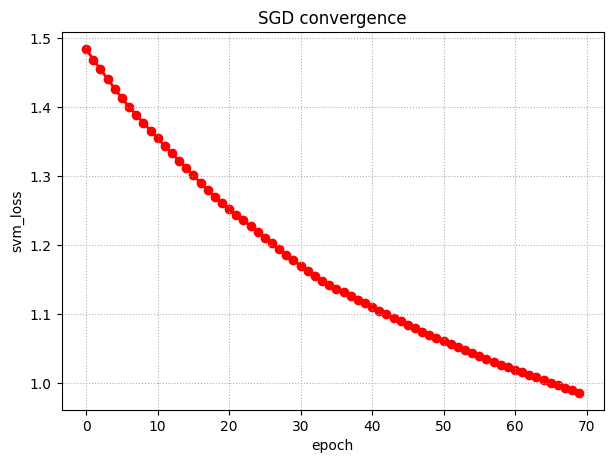

min loss: 0.9868130683898926


In [ ]:
w = torch.randn((10, 1), requires_grad=True).to(device)  # веса
optim = torch.optim.SGD([w], lr=0.1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optim, lr_lambda=lambda epoch: 0.8 if epoch >= 33 else 1)
loss_history = get_graphs_on_learning(optim, scheduler, x, w, y, n_epochs=n_epochs)
plot_graphs(range(n_epochs), loss_history, title='SGD convergence', x_label='epoch', y_label='svm_loss')
print(f"min loss: {min(loss_history)}")

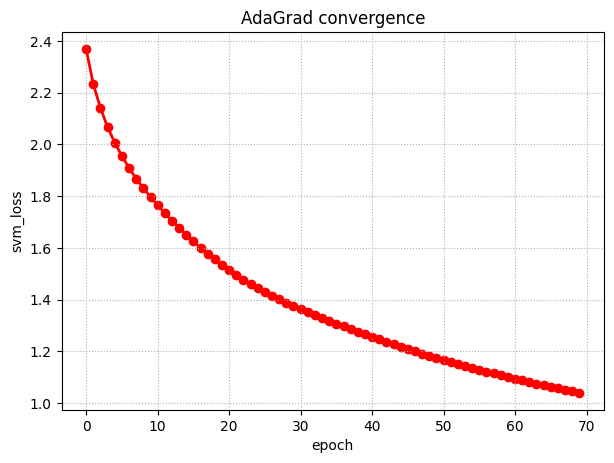

min loss: 1.0407198667526245


In [ ]:
w = torch.randn((10, 1), requires_grad=True).to(device)  # веса
optim = torch.optim.Adagrad([w], lr=0.1)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optim, lr_lambda=lambda epoch: 0.8 if epoch >= 33 else 1)
loss_history = get_graphs_on_learning(optim, scheduler, x, w, y, n_epochs=n_epochs)
plot_graphs(range(n_epochs), loss_history, title='AdaGrad convergence', x_label='epoch', y_label='svm_loss')
print(f"min loss: {min(loss_history)}")

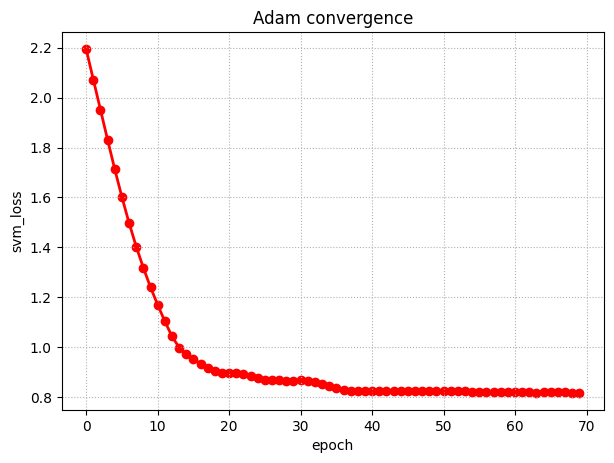

min loss: 0.819104790687561


In [ ]:
w = torch.randn((10, 1), requires_grad=True).to(device)  # веса
optim = torch.optim.Adam([w], lr=0.1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optim, lr_lambda=lambda epoch: 0.8 if epoch >= 33 else 1)
loss_history = get_graphs_on_learning(optim, scheduler, x, w, y, n_epochs=n_epochs)
plot_graphs(range(n_epochs), loss_history, title='Adam convergence', x_label='epoch', y_label='svm_loss')
print(f"min loss: {min(loss_history)}")

**Вопрос:** для чего нужен метод тензоров `.item()`?

**Ответ:** перегоняет содержимое тензора 1х1 в обычную питоновскую переменную на cpu

### Задача 6

Нужно сделать все тоже самое, что и в задании 5, только теперь сравниваем не оптимизатор, а архитектуры нейросетей.
Для сравнения зафиксируем оптимизатор Адам с параметром $lr=0.001$

Реализуйте 2 нейронных сети следующими архитектурами:

1) Последовательная сеть: x -> линейный слой в размерность 16, leaky_relu -> линейный слой в размерность 32, leaky_relu -> линейный слой в размерность 1
2)  Нелинейная сеть
    1) x -> линейный слой в 16, leaky_relu = x1
    2) x -> линейный слой в 8, tanh = x2
    3) x -> линейный слой в 8, elu = x3

        конкатенация [x1, x2, x3] -> линейный слой в 8, leaky_relu -> линейный слой в 1

Изобразите на графиках как изменяется лосс для двух архитектур нейросетей. Используйте одинаковое коилчество эпох.

я так понял, надо использовать самописный svm_loss из задания 5, т.к. иного не сказано

In [17]:
import torch.nn as nn

In [8]:
n_epochs = 70  # на 500 эпохах обе сетки сходятся к 0, интересно поставить такое же количество эпох, как для пролетарской регрессии и посмотреть, кто круче без настройки Адама

In [ ]:
X = torch.randn(100, 10).to(device)  # выборка, здесь тоже необходимо что-то поменять чтобы удовлетворить дисклеймер 2
y = torch.randint(0, 2, size=(100, 1)).to(device)
y[y == 0] = -1  # случайный массив из +1 или -1 который будет в роли таргетов

In [ ]:
X.shape

torch.Size([100, 10])

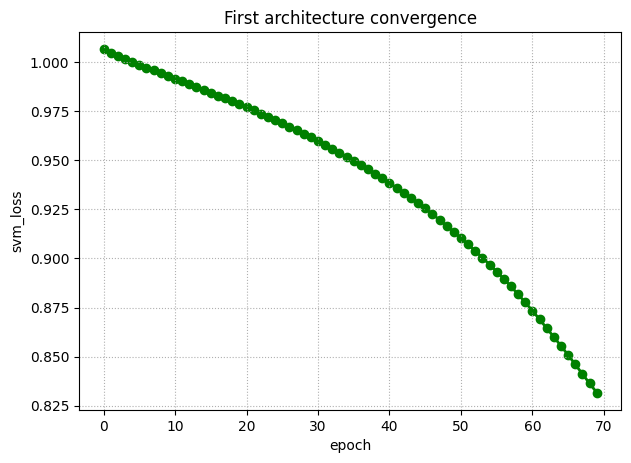

min loss: 0.831695556640625


In [ ]:
sequentialModel = nn.Sequential(
    nn.Linear(X.shape[1], 16),
    nn.LeakyReLU(),
    nn.Linear(16, 32),
    nn.LeakyReLU(),
    nn.Linear(32, 1)
).to(device)

optim = torch.optim.Adam(sequentialModel.parameters(),
                         lr=0.001)  # если поставить lr = 0.01, то 86й эпохе loss упадет до 0

loss_history = []
for epoch in range(n_epochs):
    ### optimization step
    optim.zero_grad()  # may be inefficient in case of very large NN

    y_pred = sequentialModel(X)  # .__call__(x)
    loss = svm_loss(y_pred, y)
    loss.backward()

    optim.step()  # update weights

    ### logging
    # print(f'Epoch {epoch}, loss {loss.item():.4f}')
    loss_history.append(loss.item())

plot_graphs(range(n_epochs), loss_history, title='First architecture convergence', x_label='epoch', y_label='svm_loss',
            color='green')
print(f"min loss: {min(loss_history)}")

In [ ]:
class MultiBranchModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.x1 = nn.Sequential(nn.Linear(X.shape[1], 16), nn.LeakyReLU())
        self.x2 = nn.Sequential(nn.Linear(X.shape[1], 8), nn.Tanh())
        self.x3 = nn.Sequential(nn.Linear(X.shape[1], 8), nn.ELU())

        self.linear1 = nn.Linear(16 + 8 + 8, 8)
        self.linear2 = nn.Linear(8, 1)

        self.leaky_relu = nn.LeakyReLU()

    def forward(self, x):
        x = torch.cat([self.x1(x), self.x2(x), self.x3(x)], dim=-1)
        x = self.linear1(x)
        x = self.leaky_relu(x)
        x = self.linear2(x)
        return x

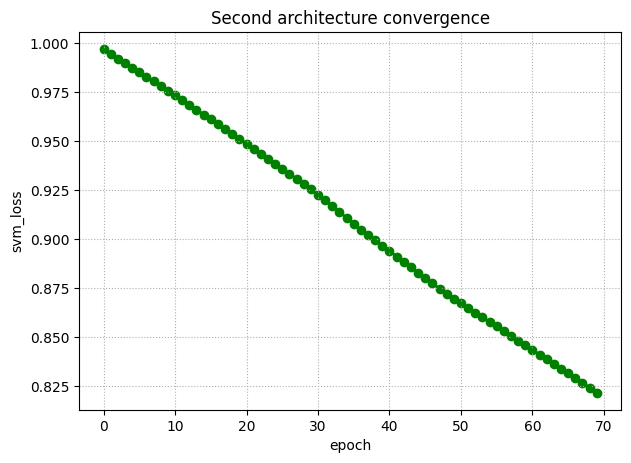

min loss: 0.8218109011650085


In [ ]:
multiBranchModel = MultiBranchModel()
optim = torch.optim.Adam(multiBranchModel.parameters(),
                         lr=0.001)  # a тут для того, чтобы лосс упал в 0 на 86й эпохе шаг надо поставить 0.1

loss_history = []
for epoch in range(n_epochs):
    ### optimization step
    optim.zero_grad()  # may be inefficient in case of very large NN

    y_pred = multiBranchModel(X)  # .__call__(x)
    loss = svm_loss(y_pred, y)
    loss.backward()

    optim.step()  # update weights

    ### logging
    # print(f'Epoch {epoch}, loss {loss.item():.4f}')
    loss_history.append(loss.item())

plot_graphs(range(n_epochs), loss_history, title='Second architecture convergence', x_label='epoch', y_label='svm_loss',
            color='green')
print(f"min loss: {min(loss_history)}")

очевидно, сетки не доучились, но я попробовал чуть-чуть понастраивать Адам (см. комменты) и обе архитектуры выдавали нулевой лосс до сотой эпохи, то есть одинаково хорошо справлялись с задачей подогнаться под данные. кто из них при этом больше переобучился не знаю, в задании про тест ничего не сказано, мне показалось, что надо просто потестить сходимость разных алгоритмов

### Задача 7

In [3]:
# download data
!wget "https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1"  quora.txt

--2022-10-27 11:56:07--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2022-10-27 11:56:08--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6697f84a0e54df10c20b627a53.dl.dropboxusercontent.com/cd/0/get/BvkVaKMdmM6zssAcOmgkwuUfvIiqBkWc6RyPtNWIlxCEVi8DMmMkqFP3J2kXh-DnJxBgZ3kEkG7FR4GYi6Km8nurh9u3iJxy6dtbpsFNQwqr7jkKLtWyHw2FO2UGbr9TSRBkeOphr1TEKTbH9Rly-UbBuEYvFE63BNb0WHHaBENuyA/file?dl=1# [following]
--2022-10-27 11:56:08--  https://uc6697f84a0e54df10c20b627a53.dl.dropboxusercontent.com/cd/0/get/BvkVaKMdmM6zssAcOmgkwuUfvIiqBkWc6RyPtNWIlxCEVi8DMmMkqFP3J2kXh-DnJxBgZ3kEkG7FR4GYi6Km8n

В текстовом файле `quora.txt` содержатся вопросы с сайта quora. В этом задании мы будем решать искуственнную задачу классификации: label = 1 если длина вопроса (в символах) *строго больше* 30. 

Для этого нам потребуется сделать несколько шагов. Первое: написать собственный датасет.

Для этого нам нужно определиться с тем, как мы будем представлять текст в виде векторов. Я предлагаю самый простой способ - Bag of Words.

Для этого вам необходимо 
1) привести все слова в датасете в нижний регистр
2) составить словарь уникальных слов в датасете, встречающиеся хотя бы 3 раза -- получится словарь размера `|V|`.
3) вектор для вопроса -- это вектор размера `|V|`, где на `i`-том месте указано, сколько раз слово с номером `i` встречается в вопросе


В случае слишком большого размера словаря (и соответственно вектора для вопросов) можно дополнительно удалить стоп-слова (например `the`, `a`, `an`, `to be`, ...). Как это легко сделать рассказано по [ссылке](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/). 

In [4]:
# если решите удалять стопслова, то необходимо выполнить эту ячейку

import nltk

nltk.download('popular')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [5]:
from tqdm import tqdm

words_dict = {}
lines_tokenized = []

file = open("quora.txt")

for line in tqdm(file):
    line_words = nltk.word_tokenize(line.lower())
    lines_tokenized.append(line_words)
    for w in line_words:
        if not w in stop_words:
            if w in words_dict:
                words_dict[w] += 1
            else:
                words_dict[w] = 1

file.close()

words = {}
index = 0
for word, count in words_dict.items():
    if count >= 3:
        words[word] = index
        index += 1

537272it [01:06, 8032.98it/s]


In [20]:
from torch.utils.data.dataset import Dataset

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


class BOWDataset(Dataset):
    def __init__(self, words, lines_tokenized):
        self.words = words
        self.lines_tokenized = lines_tokenized
        # self.processed = {}

    def __len__(self) -> int:
        return len(self.lines_tokenized)

    def __getitem__(self, idx: int):
        # if not idx in self.processed.keys():
        line = self.lines_tokenized[idx]
        vec = [0] * len(self.words)
        for w in line:
            try:
                vec[self.words[w]] += 1
            except KeyError:
                pass
        #   self.processed[idx] = [vec, 1 if len(line) > 30 else 0]

        # x = torch.FloatTensor(self.processed[idx][0]).to(device)
        # y = torch.tensor(self.processed[idx][1], dtype=torch.long).to(device)
        x = torch.FloatTensor(vec).to(device)
        y = torch.tensor(1 if len(line) > 30 else 0, dtype=torch.long).to(device)
        return tuple([x, y])

Разбейте датасет на train и test часть. Это можно сделать с помощью функций из `torch.utils.data`. Создайте `Dataloader`-ы.

In [21]:
bs = 32

In [22]:
full_set = BOWDataset(words, lines_tokenized)

In [30]:
train_size = int(0.8 * len(full_set))
test_size = len(full_set) - train_size
train_set, test_set = torch.utils.data.random_split(full_set, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=bs,
                                           shuffle=True,
                                           drop_last=True)

test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True)

Напишите любую архитектуру нейросети, которую решите использовать для такой задачи. Используйте только линейные слои и активации. Слишком глубокой делать сеть не нужно, достаточно 3-4 линейных слоев.

На выходе из нейросети должны быть вектора размерности `2` (сравните с примером про MNIST, там на выходе вектор размерности `10`)

In [24]:
mySupaCoolNN = nn.Sequential(
    nn.Linear(len(words), 1000),
    nn.ReLU(),
    nn.Linear(1000, 256),
    nn.ReLU(),
    nn.Linear(256, 2),
).to(device)

Напишите цикл обучения/валидации, запустите, изобразите на графиках как меняется loss и accuracy (за значение метрик ,балл за задание не снимается).

In [33]:
from sklearn.metrics import accuracy_score

n_epochs = 3


def train(model, optimizer, criterion, train_loader, test_loader):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    train_loss_mean = []
    val_loss_mean = []
    train_accuracy_mean = []
    val_accuracy_mean = []

    for epoch in range(n_epochs):
        # training 

        train_loss = []
        train_accuracy = []
        for x_tr, y_tr in tqdm(train_loader):
            y_pred = model(x_tr)
            loss = criterion(y_pred, y_tr)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss.append(loss.item())
            train_accuracy.append(
                accuracy_score(y_tr.cpu().detach().numpy(), np.argmax(y_pred.cpu().detach().numpy(), axis=1)))

        # validation
        val_loss = []
        val_accuracy = []
        with torch.no_grad():  # не тратим вычислительную мощность
            for x_val, y_val in tqdm(test_loader):
                y_pred = model(x_val)
                loss = criterion(y_pred, y_val)

                val_loss.append(loss.item())
                val_accuracy.append(
                    accuracy_score(y_tr.cpu().detach().numpy(), np.argmax(y_pred.cpu().detach().numpy(), axis=1)))

        train_loss_mean.append(np.mean(train_loss))
        val_loss_mean.append(np.mean(val_loss))
        train_accuracy_mean.append(np.mean(train_accuracy))
        val_accuracy_mean.append(np.mean(val_accuracy))

        print(f"Epoch: {epoch}," +
              f"train loss mean: {np.mean(train_loss)}, " +
              f"train accuracy mean: {np.mean(train_accuracy)}, " +
              f"val loss mean: {np.mean(val_loss)}, " +
              f"val accuracy mean: {np.mean(val_accuracy)}")

    return [train_loss_mean, train_accuracy_mean, val_loss_mean, val_accuracy_mean]

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mySupaCoolNN.parameters(), lr=0.0003)
metrics = train(mySupaCoolNN, optimizer, criterion, train_loader, test_loader)

100%|██████████| 3357/3357 [02:25<00:00, 23.03it/s]


Epoch: 0,train loss mean: 0.005990917436741833, train accuracy mean: 0.9981595748641203, val loss mean: 0.06572554464828394, val accuracy mean: 0.9487265415549598


100%|██████████| 3357/3357 [02:25<00:00, 23.04it/s]


Epoch: 1,train loss mean: 0.0017959876571402918, train accuracy mean: 0.9994904511949967, val loss mean: 0.10608544158040316, val accuracy mean: 0.9838025022341377


100%|██████████| 3357/3357 [02:25<00:00, 23.05it/s]

Epoch: 2,train loss mean: 0.0013849472791591553, train accuracy mean: 0.9996463405554314, val loss mean: 0.0998009360846167, val accuracy mean: 0.9835511617515639


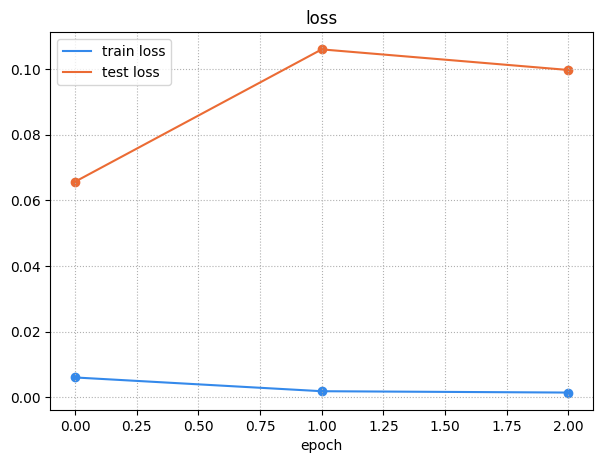

In [45]:
x = range(n_epochs)
plt.figure(figsize=(7, 5), dpi=100)
plt.title('loss')

plt.plot(x, metrics[0], color='#3489eb', label='train loss')
plt.scatter(x, metrics[0], color='#3489eb')

plt.plot(x, metrics[2], color='#eb6b34', label='test loss')
plt.scatter(x, metrics[2], color='#eb6b34')

plt.grid(ls=':')
plt.xlabel('epoch')

plt.legend(loc='best')
plt.show()

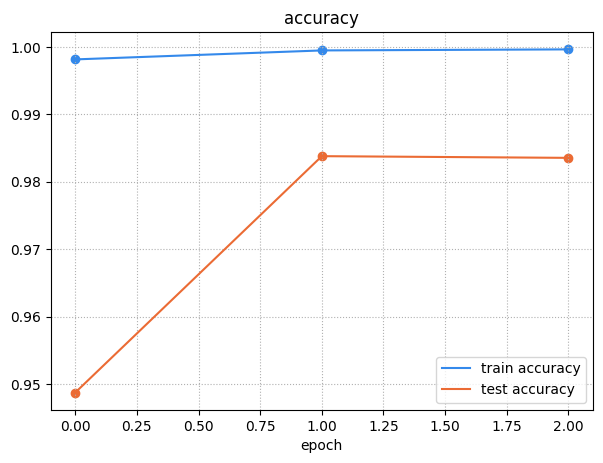

In [44]:
x = range(n_epochs)
plt.figure(figsize=(7, 5), dpi=100)
plt.title('accuracy')

plt.plot(x, metrics[1], color='#3489eb', label='train accuracy')
plt.scatter(x, metrics[1], color='#3489eb')

plt.plot(x, metrics[3], color='#eb6b34', label='test accuracy')
plt.scatter(x, metrics[3], color='#eb6b34')

plt.grid(ls=':')
plt.xlabel('epoch')

plt.legend(loc='best')
plt.show()

## FINITA!